## Product Data Scientist Test
#### Vítor Moura - Data Scientist

### Carga dos Dados

In [585]:
#Watermak
#!pip install -q -U watermark

In [586]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [587]:
%reload_ext watermark
%watermark -a "Vítor Moura" --iversions

Author: Vítor Moura

pandas    : 1.4.2
matplotlib: 3.5.1
seaborn   : 0.11.2
sklearn   : 1.0.2
numpy     : 1.21.5
sys       : 3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]



In [588]:
# Load data
df1 = pd.read_csv('desafio-ds/conexoes_espec.csv', sep = ";")
df2 = pd.read_csv('desafio-ds/individuos_espec.csv',sep=";")



In [589]:
df1

,V1,V2,grau,proximidade,prob_V1_V2
0,1,2,trabalho,visita_frequente,0.589462
1,1,3,trabalho,visita_rara,0.708465
2,2,4,trabalho,visita_casual,NaN
3,2,5,trabalho,visita_rara,0.638842
4,3,6,amigos,mora_junto,NaN
...,...,...,...,...,...
999994,499998,999996,trabalho,visita_rara,NaN
999995,499998,999997,trabalho,visita_rara,NaN
999996,499999,999998,familia,visita_casual,0.451662
999997,499999,999999,familia,visita_rara,0.186973


In [590]:
df2

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668
...,...,...,...,...,...,...,...,...,...
999995,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771
999996,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402
999997,999998,30.0,divorciado,1.0,0.0,0.0,1.0,publico,NaN
999998,999999,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569


In [591]:
# Merge das tabelas de dados por meio da V2 e Name
dataset = df2.merge(df1, left_on='name', right_on='V2')
dataset

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC,V1,V2,grau,proximidade,prob_V1_V2
0,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,1,2,trabalho,visita_frequente,0.589462
1,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,1,3,trabalho,visita_rara,0.708465
2,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,2,4,trabalho,visita_casual,NaN
3,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,2,5,trabalho,visita_rara,0.638842
4,6,20.0,NaN,1.0,0.0,1.0,0.0,publico,20.412942,3,6,amigos,mora_junto,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,499998,999996,trabalho,visita_rara,NaN
999995,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,499998,999997,trabalho,visita_rara,NaN
999996,999998,30.0,divorciado,1.0,0.0,0.0,1.0,publico,NaN,499999,999998,familia,visita_casual,0.451662
999997,999999,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569,499999,999999,familia,visita_rara,0.186973


In [592]:
# Cópia do dataframe
df_temp = dataset.copy()

### Limpeza e Transformação dos Dados

In [593]:
# Removendo colunas identidade
df_temp.drop(columns=['name', 'V1', 'V2'], inplace=True)


In [594]:
df_temp

,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC,grau,proximidade,prob_V1_V2
0,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,trabalho,visita_frequente,0.589462
1,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,trabalho,visita_rara,0.708465
2,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,trabalho,visita_casual,NaN
3,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,trabalho,visita_rara,0.638842
4,20.0,NaN,1.0,0.0,1.0,0.0,publico,20.412942,amigos,mora_junto,NaN
...,...,...,...,...,...,...,...,...,...,...,...
999994,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,trabalho,visita_rara,NaN
999995,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,trabalho,visita_rara,NaN
999996,30.0,divorciado,1.0,0.0,0.0,1.0,publico,NaN,familia,visita_casual,0.451662
999997,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569,familia,visita_rara,0.186973


In [595]:
# Removendo os valore nulos das variáveis categóricas
df_temp.dropna(subset=['estado_civil', 'transporte_mais_utilizado', 'grau','proximidade'], inplace=True)

### Preenchimento dos valores ausentes

In [596]:
# Aplicando One-Hot Encoding nas variáveis categóricas
cat_list =['estado_civil', 'transporte_mais_utilizado', 'grau', 'proximidade']
for cat in cat_list:
    onehot = pd.get_dummies(df_temp[cat], prefix=cat)
    df_temp = df_temp.join(onehot)
    

In [597]:
df_temp

,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC,grau,proximidade,...,transporte_mais_utilizado_particular,transporte_mais_utilizado_publico,transporte_mais_utilizado_taxi,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara
0,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,trabalho,visita_frequente,...,0,1,0,0,0,1,0,0,1,0
1,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,trabalho,visita_rara,...,1,0,0,0,0,1,0,0,0,1
2,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,trabalho,visita_casual,...,0,1,0,0,0,1,0,1,0,0
3,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,trabalho,visita_rara,...,0,1,0,0,0,1,0,0,0,1
5,55.0,solteiro,1.0,1.0,1.0,1.0,particular,NaN,familia,visita_casual,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,33.0,casado,0.0,0.0,0.0,NaN,particular,16.982246,familia,visita_casual,...,1,0,0,0,1,0,0,1,0,0
999994,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,trabalho,visita_rara,...,0,1,0,0,0,1,0,0,0,1
999995,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,trabalho,visita_rara,...,1,0,0,0,0,1,0,0,0,1
999996,30.0,divorciado,1.0,0.0,0.0,1.0,publico,NaN,familia,visita_casual,...,0,1,0,0,1,0,0,1,0,0


In [598]:
# Removendo as  variáveis categóricas originais
for cat in cat_list:
    df_temp.drop(cat, axis=1, inplace=True)
df_temp

,idade,qt_filhos,estuda,trabalha,pratica_esportes,IMC,prob_V1_V2,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,...,transporte_mais_utilizado_particular,transporte_mais_utilizado_publico,transporte_mais_utilizado_taxi,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara
0,24.0,0.0,0.0,0.0,1.0,25.378720,0.589462,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,35.0,1.0,0.0,0.0,1.0,19.952393,0.708465,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,50.0,1.0,1.0,1.0,0.0,26.732053,NaN,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,30.0,2.0,1.0,0.0,1.0,15.295668,0.638842,0,0,1,...,0,1,0,0,0,1,0,0,0,1
5,55.0,1.0,1.0,1.0,1.0,NaN,0.709608,0,0,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,33.0,0.0,0.0,0.0,NaN,16.982246,NaN,1,0,0,...,1,0,0,0,1,0,0,1,0,0
999994,34.0,1.0,0.0,1.0,1.0,17.556771,NaN,1,0,0,...,0,1,0,0,0,1,0,0,0,1
999995,40.0,1.0,0.0,1.0,1.0,24.848402,NaN,1,0,0,...,1,0,0,0,0,1,0,0,0,1
999996,30.0,1.0,0.0,0.0,1.0,NaN,0.451662,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [599]:
variaveis = df_temp.columns.to_list()
variaveis

['idade',
 'qt_filhos',
 'estuda',
 'trabalha',
 'pratica_esportes',
 'IMC',
 'prob_V1_V2',
 'estado_civil_casado',
 'estado_civil_divorciado',
 'estado_civil_solteiro',
 'estado_civil_viuvo',
 'transporte_mais_utilizado_particular',
 'transporte_mais_utilizado_publico',
 'transporte_mais_utilizado_taxi',
 'grau_amigos',
 'grau_familia',
 'grau_trabalho',
 'proximidade_mora_junto',
 'proximidade_visita_casual',
 'proximidade_visita_frequente',
 'proximidade_visita_rara']

In [600]:
# Contando a quantidade de valores ausentes
for i in variaveis:
    print(i, "--> Número de valores ausentes:", df_temp[i].isnull().sum())

idade --> Número de valores ausentes: 87190
qt_filhos --> Número de valores ausentes: 26208
estuda --> Número de valores ausentes: 36494
trabalha --> Número de valores ausentes: 5782
pratica_esportes --> Número de valores ausentes: 135759
IMC --> Número de valores ausentes: 103365
prob_V1_V2 --> Número de valores ausentes: 454691
estado_civil_casado --> Número de valores ausentes: 0
estado_civil_divorciado --> Número de valores ausentes: 0
estado_civil_solteiro --> Número de valores ausentes: 0
estado_civil_viuvo --> Número de valores ausentes: 0
transporte_mais_utilizado_particular --> Número de valores ausentes: 0
transporte_mais_utilizado_publico --> Número de valores ausentes: 0
transporte_mais_utilizado_taxi --> Número de valores ausentes: 0
grau_amigos --> Número de valores ausentes: 0
grau_familia --> Número de valores ausentes: 0
grau_trabalho --> Número de valores ausentes: 0
proximidade_mora_junto --> Número de valores ausentes: 0
proximidade_visita_casual --> Número de valor

In [601]:
# Lista com as variáveis ausentes
var_null = ['idade', 'qt_filhos','estuda','trabalha','pratica_esportes', 'IMC']

In [602]:
# Preenchendo os valores ausentes com a mediana 
for i in var_null:
    df_temp[i] = df_temp.groupby(['estado_civil_casado','proximidade_mora_junto','transporte_mais_utilizado_particular',
                                   'transporte_mais_utilizado_publico','proximidade_visita_frequente'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >=5 else x)


In [603]:
# Contando o número de valores NA para cada uma das variáveis
for i in var_null:
    print(i, "--> Número de valores ausentes:", df_temp[i].isnull().sum())

idade --> Número de valores ausentes: 0
qt_filhos --> Número de valores ausentes: 0
estuda --> Número de valores ausentes: 0
trabalha --> Número de valores ausentes: 0
pratica_esportes --> Número de valores ausentes: 0
IMC --> Número de valores ausentes: 0


In [604]:
# Contando a quantidade de valores ausentes
for i in variaveis:
    print(i, "--> Número de valores ausentes:", df_temp[i].isna().sum())

idade --> Número de valores ausentes: 0
qt_filhos --> Número de valores ausentes: 0
estuda --> Número de valores ausentes: 0
trabalha --> Número de valores ausentes: 0
pratica_esportes --> Número de valores ausentes: 0
IMC --> Número de valores ausentes: 0
prob_V1_V2 --> Número de valores ausentes: 454691
estado_civil_casado --> Número de valores ausentes: 0
estado_civil_divorciado --> Número de valores ausentes: 0
estado_civil_solteiro --> Número de valores ausentes: 0
estado_civil_viuvo --> Número de valores ausentes: 0
transporte_mais_utilizado_particular --> Número de valores ausentes: 0
transporte_mais_utilizado_publico --> Número de valores ausentes: 0
transporte_mais_utilizado_taxi --> Número de valores ausentes: 0
grau_amigos --> Número de valores ausentes: 0
grau_familia --> Número de valores ausentes: 0
grau_trabalho --> Número de valores ausentes: 0
proximidade_mora_junto --> Número de valores ausentes: 0
proximidade_visita_casual --> Número de valores ausentes: 0
proximidad

In [605]:
df_temp

,idade,qt_filhos,estuda,trabalha,pratica_esportes,IMC,prob_V1_V2,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,...,transporte_mais_utilizado_particular,transporte_mais_utilizado_publico,transporte_mais_utilizado_taxi,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara
0,24.0,0.0,0.0,0.0,1.0,25.378720,0.589462,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,35.0,1.0,0.0,0.0,1.0,19.952393,0.708465,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,50.0,1.0,1.0,1.0,0.0,26.732053,NaN,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,30.0,2.0,1.0,0.0,1.0,15.295668,0.638842,0,0,1,...,0,1,0,0,0,1,0,0,0,1
5,55.0,1.0,1.0,1.0,1.0,21.418236,0.709608,0,0,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,33.0,0.0,0.0,0.0,1.0,16.982246,NaN,1,0,0,...,1,0,0,0,1,0,0,1,0,0
999994,34.0,1.0,0.0,1.0,1.0,17.556771,NaN,1,0,0,...,0,1,0,0,0,1,0,0,0,1
999995,40.0,1.0,0.0,1.0,1.0,24.848402,NaN,1,0,0,...,1,0,0,0,0,1,0,0,0,1
999996,30.0,1.0,0.0,0.0,1.0,21.418557,0.451662,0,1,0,...,0,1,0,0,1,0,0,1,0,0


### Normalização dos dados

In [606]:
for i in variaveis:
    df_temp[i] = MinMaxScaler().fit_transform(df_temp[i].values.reshape(len(df_temp),1))

In [607]:
df_temp

,idade,qt_filhos,estuda,trabalha,pratica_esportes,IMC,prob_V1_V2,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,...,transporte_mais_utilizado_particular,transporte_mais_utilizado_publico,transporte_mais_utilizado_taxi,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara
0,0.216216,0.000,0.0,0.0,1.0,0.243471,0.593255,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.315315,0.125,0.0,0.0,1.0,0.179106,0.730460,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.450450,0.125,1.0,1.0,0.0,0.259523,NaN,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.270270,0.250,1.0,0.0,1.0,0.123869,0.650189,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.495495,0.125,1.0,1.0,1.0,0.196493,0.731779,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,0.297297,0.000,0.0,0.0,1.0,0.143875,NaN,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
999994,0.306306,0.125,0.0,1.0,1.0,0.150690,NaN,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
999995,0.360360,0.125,0.0,1.0,1.0,0.237180,NaN,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
999996,0.270270,0.125,0.0,0.0,1.0,0.196497,0.434377,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Modelagem Preditiva

In [608]:
# 1º Método para o preenchimento com agrupamento

In [609]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

In [696]:
df_temp01 = df_temp.copy()

In [697]:
# Preenchendo os valores nulos da variável prob_V1_V2
var_null1 = ['prob_V1_V2']

for i in var_null1:
    df_temp01[i] = df_temp01.groupby(['estado_civil_casado','proximidade_mora_junto','transporte_mais_utilizado_particular',
                                   'transporte_mais_utilizado_publico','proximidade_visita_frequente'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >=5 else x)


In [698]:
# Contando a quantidade de valores ausentes
for i in var_null1:
    print(i, "--> Número de valores ausentes:", df_temp01[i].isna().sum())

prob_V1_V2 --> Número de valores ausentes: 0


In [699]:
df_temp01.isnull().sum()

idade                                   0
qt_filhos                               0
estuda                                  0
trabalha                                0
pratica_esportes                        0
IMC                                     0
prob_V1_V2                              0
estado_civil_casado                     0
estado_civil_divorciado                 0
estado_civil_solteiro                   0
estado_civil_viuvo                      0
transporte_mais_utilizado_particular    0
transporte_mais_utilizado_publico       0
transporte_mais_utilizado_taxi          0
grau_amigos                             0
grau_familia                            0
grau_trabalho                           0
proximidade_mora_junto                  0
proximidade_visita_casual               0
proximidade_visita_frequente            0
proximidade_visita_rara                 0
dtype: int64

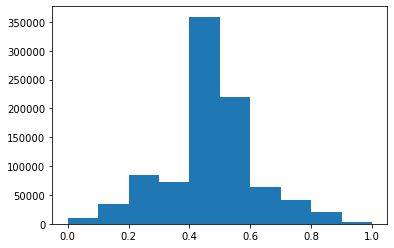

In [700]:
# Dados fornecerem uma distribuição normal (ótimo)
plt.hist(df_temp01['prob_V1_V2'])
plt.show()

### 2º Método para prever a taxa de infecção

In [668]:
df_temp02 = df_temp01.iloc[:5000,:]
df_temp02

,idade,qt_filhos,estuda,trabalha,pratica_esportes,IMC,prob_V1_V2,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,...,transporte_mais_utilizado_particular,transporte_mais_utilizado_publico,transporte_mais_utilizado_taxi,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara
0,0.216216,0.000,0.0,0.0,1.0,0.243471,0.593255,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.315315,0.125,0.0,0.0,1.0,0.179106,0.730460,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.450450,0.125,1.0,1.0,0.0,0.259523,0.449648,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.270270,0.250,1.0,0.0,1.0,0.123869,0.650189,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.495495,0.125,1.0,1.0,1.0,0.196493,0.731779,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,0.342342,0.000,0.0,0.0,1.0,0.171390,0.451489,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5484,0.279279,0.125,0.0,1.0,0.0,0.130737,0.118764,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5486,0.180180,0.125,0.0,0.0,1.0,0.336894,0.738114,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5487,0.081081,0.000,1.0,0.0,1.0,0.422271,0.451489,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [669]:
# Informando a target
target = df_temp02["prob_V1_V2"]
df_temp02.drop(columns=['prob_V1_V2'], inplace=True)


In [670]:
target

0       0.593255
1       0.730460
2       0.449648
3       0.650189
5       0.731779
          ...   
5483    0.451489
5484    0.118764
5486    0.738114
5487    0.451489
5488    0.293362
Name: prob_V1_V2, Length: 5000, dtype: float64

In [671]:
df_temp01

,idade,qt_filhos,estuda,trabalha,pratica_esportes,IMC,prob_V1_V2,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,...,transporte_mais_utilizado_particular,transporte_mais_utilizado_publico,transporte_mais_utilizado_taxi,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara
0,0.216216,0.000,0.0,0.0,1.0,0.243471,0.593255,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.315315,0.125,0.0,0.0,1.0,0.179106,0.730460,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.450450,0.125,1.0,1.0,0.0,0.259523,0.449648,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.270270,0.250,1.0,0.0,1.0,0.123869,0.650189,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.495495,0.125,1.0,1.0,1.0,0.196493,0.731779,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,0.297297,0.000,0.0,0.0,1.0,0.143875,0.588217,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
999994,0.306306,0.125,0.0,1.0,1.0,0.150690,0.449648,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
999995,0.360360,0.125,0.0,1.0,1.0,0.237180,0.588217,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
999996,0.270270,0.125,0.0,0.0,1.0,0.196497,0.434377,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [672]:
# Divisão entre dados de treino e de teste
X_treino,x_teste, y_treino,y_test = train_test_split(df_temp02, target, test_size=0.35, random_state=42)

In [673]:
X_treino

,idade,qt_filhos,estuda,trabalha,pratica_esportes,IMC,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,estado_civil_viuvo,transporte_mais_utilizado_particular,transporte_mais_utilizado_publico,transporte_mais_utilizado_taxi,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara
4357,0.234234,0.375,1.0,1.0,1.0,0.103273,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5032,0.135135,0.000,1.0,0.0,0.0,0.196497,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
463,0.243243,0.625,0.0,1.0,0.0,0.117383,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3746,0.126126,0.000,1.0,0.0,0.0,0.094194,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,0.378378,0.125,0.0,1.0,1.0,0.426313,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,0.279279,0.000,1.0,0.0,1.0,0.210697,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
512,0.306306,0.000,0.0,0.0,0.0,0.279392,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3386,0.315315,0.250,0.0,0.0,1.0,0.147662,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4132,0.189189,0.250,0.0,0.0,0.0,0.251433,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [674]:
x_teste

,idade,qt_filhos,estuda,trabalha,pratica_esportes,IMC,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,estado_civil_viuvo,transporte_mais_utilizado_particular,transporte_mais_utilizado_publico,transporte_mais_utilizado_taxi,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara
1644,0.189189,0.125,0.0,1.0,1.0,0.177420,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2841,0.315315,0.000,1.0,1.0,1.0,0.287378,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2914,0.243243,0.125,1.0,1.0,1.0,0.308515,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1158,0.405405,0.125,1.0,0.0,1.0,0.203857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
774,0.135135,0.000,1.0,0.0,1.0,0.130016,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,0.252252,0.125,0.0,0.0,1.0,0.231138,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3470,0.198198,0.000,1.0,1.0,1.0,0.282643,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2486,0.216216,0.000,0.0,0.0,1.0,0.200541,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4173,0.162162,0.000,0.0,0.0,0.0,0.180325,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [675]:
y_treino

4357    0.475587
5032    0.451489
463     0.675233
3746    0.378920
7       0.449996
          ...   
4860    0.556627
512     0.449648
3386    0.451489
4132    0.847761
935     0.449648
Name: prob_V1_V2, Length: 3250, dtype: float64

In [676]:
y_test

1644    0.567115
2841    0.521284
2914    0.298457
1158    0.769208
774     0.451489
          ...   
1344    0.451489
3470    0.630972
2486    0.451489
4173    0.579482
1334    0.410876
Name: prob_V1_V2, Length: 1750, dtype: float64

In [677]:
# Criando Regressor com Linear Regression
reg_v1 = LinearRegression()

In [678]:
# Criando modelo de regressão linear
start = time.time()
modelo_v1 = reg_v1.fit(X_treino, y_treino)
end = time.time()
print("Tempo de Treinamento do Modelo: ", end - start)

Tempo de Treinamento do Modelo:  0.002283811569213867


In [679]:
# Realizando Previsões
pred = modelo_v1.predict(x_teste)

In [680]:
# Computando os  erros entre valores observados e previstos
mean_squared_error(pred, y_test)

0.015763225560229258

In [681]:
# Criando o Random Forest Regressor
reg_V2 = RandomForestRegressor(n_estimators=1, random_state=42, max_depth=1, max_leaf_nodes=2)

In [682]:
# Treinando o modelo
start = time.time()
modelo_v2 = reg_V2.fit(X_treino, y_treino)
end = time.time()
print("Tempo de Treinamento do Modelo: ", (end - start))

Tempo de Treinamento do Modelo:  0.002789020538330078


In [683]:
pred = modelo_v2.predict(x_teste)

In [684]:
mean_squared_error(pred,y_test)

0.018649441284085733

In [685]:
# Criando o Decision Tree Regressor
reg_V3 = DecisionTreeRegressor(random_state=42, max_depth=0.1)

In [686]:
# Treinando o modelo
start = time.time()
modelo_v3 = reg_V3.fit(X_treino, y_treino)
end = time.time()
print("Tempo de Treinamento do Modelo: ", end - start)

Tempo de Treinamento do Modelo:  0.001409769058227539


In [687]:
pred = modelo_v3.predict(x_teste)

In [688]:
mean_squared_error(pred,y_test)

0.022096982172645857

In [498]:
pred

array([0.47394324, 0.47394324, 0.47394324, ..., 0.47394324, 0.47394324,
       0.47394324])

In [499]:
y_test

1644    0.567115
2841    0.521284
2914    0.298457
1158    0.769208
774     0.451489
          ...   
1344    0.451489
3470    0.630972
2486    0.451489
4173    0.579482
1334    0.410876
Name: prob_V1_V2, Length: 1750, dtype: float64

In [689]:
# Modelos acima apresentaram precisão muito boa, o que foi bom demais, apresentando overfitting. 

In [701]:
# Treinando modelo de Neural Network
from sklearn.neural_network import MLPRegressor
nnt_v1 = MLPRegressor(hidden_layer_sizes=(30,2,2), max_iter=5, random_state=42)

In [702]:
modelo_v4 = nnt_v1.fit(X_treino, y_treino)

In [703]:
pred = modelo_v4.predict(x_teste)

In [704]:
mean_squared_error(pred,y_test)

0.10957381387367593

In [705]:
# Salvando o modelo que apresentou melhor resultado
import pickle
with open("neuralnetw.pkl", "wb") as f:
    pickle.dump(modelo_v4, f)